# Linear Regression from Scratch

Welcome! Here I have created a Simple Linear Regression Model from scratch and used gradient descend algorithm to reduce the cost function. The cost function reduction is plotted below and the updated weights and bias are printed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Linear Regression Class
class LinearRegression:
    
    def __init__(self, x, y):
        
        self.x = x #features
        self.y = y #lables
        self.w = 0 #weights
        self.b = 0#bias
        self.alpha = 0.01 #learning factor
        self.n = len(x) #No of elements
        self.cost_dict = {}
        self.cost_iter = []
        self.li_cost = [] 
        
    def cost(self):
        
        return np.sum(((self.y - ((self.x * self.w) + self.b)) ** 2 )) / self.n
    
    def gradient(self):
        
        grad_w = -(2 / self.n) * np.sum((self.y - ((self.x * self.w) + self.b)) * self.x)
        grad_b = -(2 / self.n) * np.sum((self.y - ((self.x * self.w) + self.b)))
        return grad_w, grad_b
        
    def update_parameters(self):
        
        self.w = self.w - self.alpha * self.gradient()[0]
        self.b = self.b - self.alpha * self.gradient()[1]
        #return self.w, self.b
    
    def Model_Training(self):

        for i in range(1000):
            self.update_parameters()
            self.cost_iter.append(i)
            self.li_cost.append(self.cost())
            #print('The Cost Function is {}'.format(self.cost()))
            
    def Model_Testing(self, test_data):
        
        y_pred = self.w * test_data + self.b
        return y_pred
      

In [3]:
#Creating simple linear dataset to work with the Model
x = np.array([1, 3, 4, 6, 7])
y = x*2 + 3

In [4]:
Model = LinearRegression(x, y)

In [5]:
Model.Model_Training()


# Number of Training Cycles vs Cost Function

Text(0.5, 1.0, 'Cost Function Optimization')

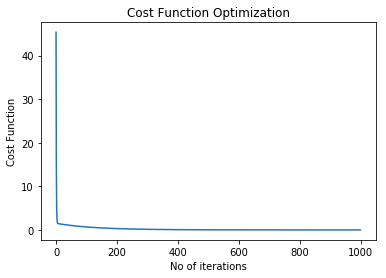

In [6]:
plt.plot(Model.cost_iter, Model.li_cost)
plt.xlabel('No of iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function Optimization')

In [7]:
print("The cost function before optimization/training is ", Model.li_cost[0])
print("The Cost function after optimization/training is ", Model.li_cost[-1])

The cost function before optimization/training is  45.3598656576
The Cost function after optimization/training is  0.00047945285200717906


# Testing of the Model

In [8]:
#Creating Dataset for testing
test = np.array([8, 10, 12, 1]) #test data
label = test * 2 + 3 #Actual Output

In [18]:
prediction = Model.Model_Testing(test)

In [19]:
#prediction of the Model
#print(prediction)
import pandas as pd
data_dict = {'Actual Values' : label, 'Predicted Values' : prediction}
pd.DataFrame(data_dict)

,Actual Values,Predicted Values
0,19,19.025475
1,23,23.043920
2,27,27.062365
3,5,4.960917


In [11]:
#Error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(label, prediction))
print('MSE:', metrics.mean_squared_error(label, prediction))

MAE: 0.042710598093736785
MSE: 0.0019986919031525796


# Thank You